In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sn
import pickle

from matplotlib import pyplot as plt
from io import StringIO
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, f1_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df_listings_details = pd.read_csv('../data/listings_detailed.csv')
df_listings = pd.read_csv('../data/listings.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_merged_listings = pd.concat([df_listings, df_listings_details], axis=1)

In [5]:
df_merged_listings = df_merged_listings.loc[:, ~df_merged_listings.columns.duplicated()]

In [6]:
df_merged_listings.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,listing_url,scrape_id,last_scraped,source,description,neighborhood_overview,picture_url,host_url,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,calendar_last_scraped,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,40625,"Near Palace Schönbrunn, Apt. 1",175131,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire home/apt,140.0,1,225,2025-08-20,1.22,14,137,8,NaN,https://www.airbnb.com/rooms/40625,20250914152932,2025-09-14,city scrape,Welcome to my Apt. 1!<br /><br />This is a 2be...,The neighbourhood offers plenty of restaurants...,https://a0.muscache.com/pictures/11509144/d55c...,https://www.airbnb.com/users/show/175131,2010-07-20,"Vienna, Austria",I´m originally from Sweden but have been livin...,within an hour,100%,95%,NaN,https://a0.muscache.com/im/users/175131/profil...,https://a0.muscache.com/im/users/175131/profil...,Rudolfsheim-Fünfhaus,15.0,18.0,"['email', 'phone']",t,t,Rudolfsheim-Fnfhaus,NaN,Entire rental unit,6,1.0,1 bath,2.0,3.0,"[""Smoke alarm"", ""Pack \u2019n play/Travel crib...",365,1.0,30.0,365.0,365.0,16.3,365.0,NaN,t,18,34,61,2025-09-14,1,69,15,48,6720.0,2010-08-04,4.86,4.91,4.89,4.89,4.94,4.61,4.73,f,13,1,0
1,51287,little studio- next to citycenter- wifi- nice ...,166283,Hannes,NaN,Leopoldstadt,48.21778,16.37847,Entire home/apt,71.0,30,383,2025-07-04,2.15,2,207,3,NaN,https://www.airbnb.com/rooms/51287,20250914152932,2025-09-14,city scrape,small studio in new renovated old house and ve...,The neighbourhood has a lot of very nice littl...,https://a0.muscache.com/pictures/25163038/1c4e...,https://www.airbnb.com/users/show/166283,2010-07-14,"Vienna, Austria",I am open minded and like travelling myself. I...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/166283/profil...,https://a0.muscache.com/im/users/166283/profil...,Leopoldstadt,2.0,3.0,"['email', 'phone']",t,t,Leopoldstadt,NaN,Entire rental unit,2,1.0,1 bath,0.0,2.0,"[""Smoke alarm"", ""Stove"", ""Coffee maker"", ""Drye...",180,30.0,30.0,180.0,180.0,30.0,180.0,NaN,t,0,0,27,2025-09-14,0,46,9,180,12780.0,2011-01-27,4.67,4.78,4.51,4.92,4.95,4.87,4.59,f,2,0,0


In [51]:
listings_selected_columns = ['room_type', 'minimum_nights', 
   'availability_eoy', 'availability_365', 
    'host_response_rate', 'host_acceptance_rate',
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'estimated_occupancy_l365d', 'estimated_revenue_l365d',
    'number_of_reviews', 'number_of_reviews_l30d', 'reviews_per_month', 
    'review_scores_rating', 'review_scores_value', 
    'instant_bookable', 'calculated_host_listings_count', 'price']


In [52]:
df_regression_master = df_merged_listings[listings_selected_columns]

In [53]:
df_regression_master.head(1)

,room_type,minimum_nights,availability_eoy,availability_365,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews,number_of_reviews_l30d,reviews_per_month,review_scores_rating,review_scores_value,instant_bookable,calculated_host_listings_count,price
0,Entire home/apt,1,69,137,100%,95%,6,1.0,2.0,3.0,48,6720.0,225,1,1.22,4.86,4.73,f,14,140.0


In [54]:
df_regression_master.isna().sum()

room_type                            0
minimum_nights                       0
availability_eoy                     0
availability_365                     0
host_response_rate                3710
host_acceptance_rate              3181
accommodates                         0
bathrooms                         3794
bedrooms                          1369
beds                              3811
estimated_occupancy_l365d            0
estimated_revenue_l365d           3817
number_of_reviews                    0
number_of_reviews_l30d               0
reviews_per_month                 2289
review_scores_rating              2289
review_scores_value               2290
instant_bookable                     0
calculated_host_listings_count       0
price                             3817
dtype: int64

In [55]:
df_cleaned = df_regression_master.dropna()

In [56]:
df_cleaned.isna().sum()

room_type                         0
minimum_nights                    0
availability_eoy                  0
availability_365                  0
host_response_rate                0
host_acceptance_rate              0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
estimated_occupancy_l365d         0
estimated_revenue_l365d           0
number_of_reviews                 0
number_of_reviews_l30d            0
reviews_per_month                 0
review_scores_rating              0
review_scores_value               0
instant_bookable                  0
calculated_host_listings_count    0
price                             0
dtype: int64

In [57]:
df_cleaned.head(1)

,room_type,minimum_nights,availability_eoy,availability_365,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews,number_of_reviews_l30d,reviews_per_month,review_scores_rating,review_scores_value,instant_bookable,calculated_host_listings_count,price
0,Entire home/apt,1,69,137,100%,95%,6,1.0,2.0,3.0,48,6720.0,225,1,1.22,4.86,4.73,f,14,140.0


In [58]:
unique_rooms = df_cleaned['room_type'].unique()
print(unique_rooms)

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


In [59]:
df_cleaned.describe()

,minimum_nights,availability_eoy,availability_365,accommodates,bathrooms,bedrooms,beds,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews,number_of_reviews_l30d,reviews_per_month,review_scores_rating,review_scores_value,calculated_host_listings_count,price
count,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8.182000e+03,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000
mean,6.229406,57.160719,216.329382,3.679663,1.176363,1.297116,2.026644,96.235273,1.073732e+04,60.226473,1.413835,1.860040,4.663546,4.604091,27.861892,126.390858
std,13.870260,31.956932,112.917992,1.954106,0.440786,0.858865,1.314600,90.974724,2.487310e+04,94.958205,2.133795,1.967208,0.473658,0.464303,59.858281,301.186468
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.010000,1.000000,1.000000,1.000000,13.000000
25%,1.000000,32.000000,115.000000,2.000000,1.000000,1.000000,1.000000,18.000000,1.602000e+03,6.000000,0.000000,0.460000,4.590000,4.500000,2.000000,65.000000
50%,2.000000,61.000000,246.000000,4.000000,1.000000,1.000000,2.000000,60.000000,5.940000e+03,22.000000,1.000000,1.190000,4.790000,4.710000,6.000000,91.000000
75%,3.000000,84.000000,318.000000,4.000000,1.000000,2.000000,2.000000,168.000000,1.442700e+04,73.000000,2.000000,2.660000,4.930000,4.850000,23.000000,136.000000
max,200.000000,109.000000,365.000000,16.000000,9.000000,14.000000,20.000000,255.000000,1.073550e+06,1347.000000,31.000000,26.450000,5.000000,5.000000,396.000000,10000.000000


In [60]:
filtered_columns = ['room_type', 'minimum_nights', 
   'availability_eoy', 'availability_365', 
    'host_response_rate', 'host_acceptance_rate',
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'estimated_occupancy_l365d', 'estimated_revenue_l365d',
    'number_of_reviews', 'reviews_per_month', 
    'review_scores_rating', 'review_scores_value', 
    'instant_bookable', 'calculated_host_listings_count', 'price']


In [61]:
df_cleaned = df_cleaned[filtered_columns]

In [62]:
df_cleaned_new = df_cleaned[df_cleaned['availability_eoy']> 0]

In [63]:
df_cleaned_new = df_cleaned_new[df_cleaned_new['availability_365']> 0]

In [64]:
df_cleaned_new = df_cleaned_new[df_cleaned_new['estimated_occupancy_l365d']> 0]

In [65]:
df_cleaned_new.describe()

,minimum_nights,availability_eoy,availability_365,accommodates,bathrooms,bedrooms,beds,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_value,calculated_host_listings_count,price
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,4.811007,60.023749,221.289249,3.727247,1.175341,1.307167,2.055176,107.589306,11540.530859,65.729664,2.080991,4.669748,4.616711,23.754551,121.948094
std,10.721728,29.062483,110.108840,1.982316,0.446753,0.873488,1.308299,89.868310,16768.940443,98.699159,2.009784,0.459060,0.438546,44.738149,301.817737
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000,126.000000,1.000000,0.030000,1.000000,1.000000,1.000000,18.000000
25%,1.000000,37.000000,124.000000,2.000000,1.000000,1.000000,1.000000,24.000000,2556.000000,7.000000,0.650000,4.600000,4.530000,2.000000,65.000000
50%,2.000000,62.000000,252.000000,4.000000,1.000000,1.000000,2.000000,78.000000,7254.000000,27.000000,1.480000,4.790000,4.720000,6.000000,90.000000
75%,3.000000,84.000000,318.000000,4.000000,1.000000,2.000000,3.000000,186.000000,15810.000000,83.000000,2.960000,4.920000,4.840000,22.000000,132.000000
max,200.000000,109.000000,365.000000,16.000000,9.000000,14.000000,20.000000,255.000000,756000.000000,1347.000000,26.450000,5.000000,5.000000,396.000000,10000.000000


In [66]:
len(df_cleaned_new)

7032

In [67]:
df_cleaned_new.head(1)

,room_type,minimum_nights,availability_eoy,availability_365,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_value,instant_bookable,calculated_host_listings_count,price
0,Entire home/apt,1,69,137,100%,95%,6,1.0,2.0,3.0,48,6720.0,225,1.22,4.86,4.73,f,14,140.0


In [68]:
room_mapping = {'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3, 'Hotel room': 4}

In [69]:
df_cleaned_new['room_code'] = df_cleaned_new['room_type'].map(room_mapping)

In [70]:
df_cleaned_new.head(5)

,room_type,minimum_nights,availability_eoy,availability_365,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_value,instant_bookable,calculated_host_listings_count,price,room_code
0,Entire home/apt,1,69,137,100%,95%,6,1.0,2.0,3.0,48,6720.0,225,1.22,4.86,4.73,f,14,140.0,1
1,Entire home/apt,30,46,207,100%,100%,2,1.0,0.0,2.0,180,12780.0,383,2.15,4.67,4.59,f,2,71.0,1
2,Entire home/apt,1,66,134,100%,95%,4,1.0,0.0,4.0,54,3564.0,152,0.93,4.87,4.82,f,14,66.0,1
6,Private room,2,8,255,100%,69%,2,1.0,1.0,1.0,120,6960.0,445,2.59,4.77,4.77,f,1,58.0,2
7,Entire home/apt,1,26,251,100%,99%,3,1.0,0.0,1.0,54,3132.0,112,0.89,4.85,4.75,t,11,58.0,1


In [71]:
new_filtered_columns = ['minimum_nights', 
    'host_response_rate', 'host_acceptance_rate',
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
   'availability_eoy', 'availability_365', 
    'estimated_occupancy_l365d', 'estimated_revenue_l365d',
    'number_of_reviews', 'reviews_per_month', 
    'review_scores_rating', 'review_scores_value', 
    'instant_bookable', 'calculated_host_listings_count', 'price']

In [77]:
df_cleaned_new['host_response_rate'] = df_cleaned_new['host_response_rate'].str.replace('%', '', regex=False).astype(float)

In [78]:
df_cleaned_new['host_acceptance_rate'] = df_cleaned_new['host_acceptance_rate'].str.replace('%', '', regex=False).astype(float)

In [79]:
df_analysis_interest = df_cleaned_new[new_filtered_columns]

In [80]:
df_analysis_interest.describe()

,minimum_nights,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,availability_eoy,availability_365,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_value,calculated_host_listings_count,price
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,4.811007,96.206342,93.476536,3.727247,1.175341,1.307167,2.055176,60.023749,221.289249,107.589306,11540.530859,65.729664,2.080991,4.669748,4.616711,23.754551,121.948094
std,10.721728,11.925727,14.877015,1.982316,0.446753,0.873488,1.308299,29.062483,110.108840,89.868310,16768.940443,98.699159,2.009784,0.459060,0.438546,44.738149,301.817737
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,126.000000,1.000000,0.030000,1.000000,1.000000,1.000000,18.000000
25%,1.000000,99.000000,96.000000,2.000000,1.000000,1.000000,1.000000,37.000000,124.000000,24.000000,2556.000000,7.000000,0.650000,4.600000,4.530000,2.000000,65.000000
50%,2.000000,100.000000,99.000000,4.000000,1.000000,1.000000,2.000000,62.000000,252.000000,78.000000,7254.000000,27.000000,1.480000,4.790000,4.720000,6.000000,90.000000
75%,3.000000,100.000000,100.000000,4.000000,1.000000,2.000000,3.000000,84.000000,318.000000,186.000000,15810.000000,83.000000,2.960000,4.920000,4.840000,22.000000,132.000000
max,200.000000,100.000000,100.000000,16.000000,9.000000,14.000000,20.000000,109.000000,365.000000,255.000000,756000.000000,1347.000000,26.450000,5.000000,5.000000,396.000000,10000.000000


In [101]:
interested_features = ['minimum_nights', 
    'host_response_rate', 'host_acceptance_rate',
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'number_of_reviews', 'review_scores_rating']

target = 'price'

In [102]:
X_full = df_analysis_interest[interested_features]
y_full = df_analysis_interest[target]

X_train_val, X_test, y_train_val, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
len(X_train), len(X_val), len(X_test)

(4218, 1407, 1407)

In [103]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
y_pred_linear_val = lin_reg.predict(X_val)

In [105]:
r2s_lin_reg = r2_score(y_val, y_pred_linear_val)
rmse_lin_reg = mean_squared_error(y_val, y_pred_linear_val) 

print("R^2 Score", r2s_lin_reg)
print("RMSE", rmse_lin_reg)

np.set_printoptions(suppress=True, precision=6)
coefficients = pd.DataFrame({'feature':interested_features, 'coefficient' : lin_reg.coef_})
print(coefficients.round(6))

R^2 Score 0.0069831815778600426
RMSE 51653.61258281346
                feature  coefficient
0        minimum_nights    -0.404267
1    host_response_rate    -0.463964
2  host_acceptance_rate     0.646364
3          accommodates    11.077177
4             bathrooms    16.121245
5              bedrooms    22.967642
6                  beds     8.301096
7     number_of_reviews    -0.090985
8  review_scores_rating    -0.002329


In [86]:
rf_regression= RandomForestRegressor(n_estimators=10,random_state=42, n_jobs=-1)
rf_regression.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
y_pred_rf_val = rf_regression.predict(X_val)

In [88]:
print("R^2 Score", r2_score(y_val, y_pred_rf_val))
print("RMSE", mean_squared_error(y_val, y_pred_rf_val))

R^2 Score -0.9178915765920199
RMSE 99762.6894482382


In [89]:
interested_features

importances = rf_regression.feature_importances_
most_important_index = np.argmax(importances)
most_important_index
most_important_feature = interested_features[most_important_index]
print(most_important_feature)

feat_imp = pd.Series(importances, index=X_full.columns).sort_values(ascending=False)
print(feat_imp)

review_scores_value
review_scores_value     0.290537
review_scores_rating    0.163574
accommodates            0.132769
host_acceptance_rate    0.097106
host_response_rate      0.079858
number_of_reviews       0.076126
bedrooms                0.062947
beds                    0.046024
bathrooms               0.026401
minimum_nights          0.024658
dtype: float64


In [90]:
def random_forest_varied_depth_estimator(depth, estimator):
    rf= RandomForestRegressor(n_estimators=estimator,max_depth=depth, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2s = r2_score(y_val, y_pred)
    return rmse, r2s

In [91]:
def find_best_depth_estimator():
    depths = [10,15,20,25, 30, 35]
    estimators = np.arange(10,210,10)

    rmse_summary = {}
    r2s_summary = {}
    results_list = []
    
    for depth in depths:
        rmses=[]
        r2ses=[]
        for estimator in estimators:
            rmse, r2s = random_forest_varied_depth_estimator(depth, estimator)
            rmses.append(rmse)
            r2ses.append(r2s)
            results_list.append({
                'depth' : depth,
                'estimator' : estimator,
                'rmse': rmse,
                'r2s' : r2s
            })
            
        rmse_summary[depth] = np.mean(rmses)
        r2s_summary[depth] = np.mean(r2ses)

    best_depth= min(rmse_summary, key=rmse_summary.get)
    
    results_df=pd.DataFrame(results_list)
    best_results_from_max_depth = results_df[results_df['depth']==best_depth]
    
    best_result_row = best_results_from_max_depth.loc[best_results_from_max_depth['rmse'].idxmin()]
    best_estimator = int(best_result_row['estimator'])
    return best_depth, best_estimator

In [92]:
best_max_depth, best_estimator = find_best_depth_estimator()
print("MAX Depth : ",best_max_depth)
print("Estimator : ",best_estimator)

best_rf_regressor = RandomForestRegressor(n_estimators=best_estimator,random_state=42, n_jobs=-1, max_depth=best_max_depth)
best_rf_regressor.fit(X_train, y_train)

y_pred_best_rf_val = rf_regression.predict(X_val)

MAX Depth :  20
Estimator :  170


In [93]:
print(best_max_depth, best_estimator)
r2s_rf_reg  = r2_score(y_val, y_pred_best_rf_val)
rmse_rf_reg = mean_squared_error(y_val, y_pred_best_rf_val)

print("R2 Square of Random Forest : ", r2s_rf_reg)
print("RMSE of Random Forest : ", rmse_rf_reg)

20 170
R2 Square of Random Forest :  -0.9178915765920199
RMSE of Random Forest :  99762.6894482382


In [94]:
if(rmse_rf_reg < rmse_lin_reg):
    print("Random Forest is better")
else:
    print("Linear Regression is better")

Linear Regression is better



Gradient Boosting Results:
RMSE: $296.42M
R² Score: -0.6892
MAE: $63.15M

 Feature Importance:
                feature  importance
9   review_scores_value    0.369844
8  review_scores_rating    0.227309
1    host_response_rate    0.097428
7     number_of_reviews    0.076795
5              bedrooms    0.067306
3          accommodates    0.055750
2  host_acceptance_rate    0.050991
6                  beds    0.041302
4             bathrooms    0.011441
0        minimum_nights    0.001835


Text(0, 0.5, 'Feature')

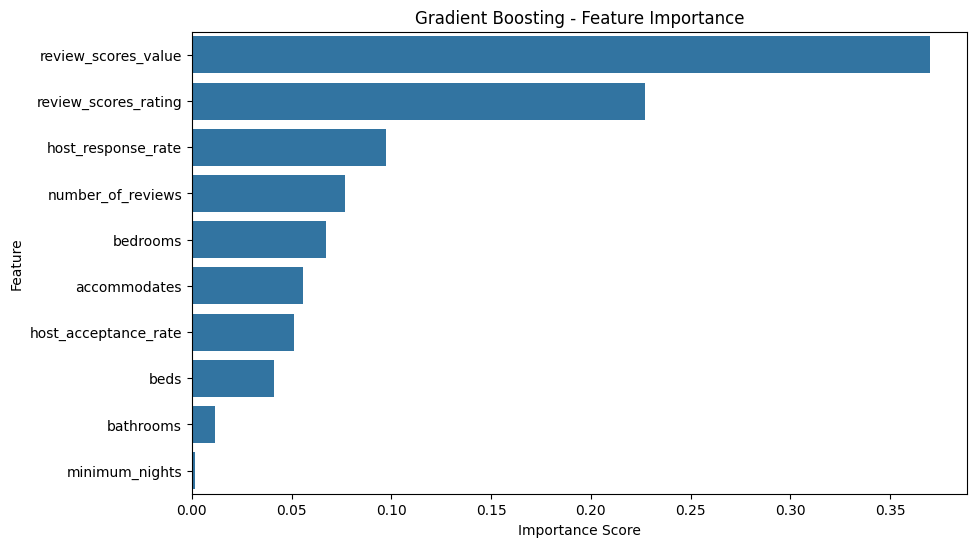

In [95]:
gb_model = GradientBoostingRegressor(
    n_estimators=100,      # Number of boosting stages
    learning_rate=0.1,     # How much each tree contributes
    max_depth=3,           # Maximum depth of each tree
    min_samples_split=2,   # Minimum samples required to split
    min_samples_leaf=1,    # Minimum samples required at leaf node
    random_state=42
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_val_gb = gb_model.predict(X_val)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val_gb))
r2 = r2_score(y_val, y_pred_val_gb)
mae = mean_absolute_error(y_val, y_pred_val_gb)

print("\nGradient Boosting Results:")
print(f"RMSE: ${rmse:.2f}M")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:.2f}M")


feature_importance = pd.DataFrame({
    'feature': X_full.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sn.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Gradient Boosting - Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

In [96]:
print("Model Type:", type(gb_model))
print("Model Parameters:", gb_model.get_params())

Model Type: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Model Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [97]:
import xgboost as xgb

In [98]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    n_estimators=100,              # Number of trees
    learning_rate=0.1,             # Step size shrinkage
    max_depth=3,                   # Maximum tree depth
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_compare_xgb_vals = xgb_model.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred_compare_xgb_vals))
r2 = r2_score(y_val, y_pred_compare_xgb_vals)
mae = mean_absolute_error(y_val, y_pred_compare_xgb_vals)

print("XGBoost Results:")
print(f"RMSE: ${rmse:.2f}M")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:.2f}M")

XGBoost Results:
RMSE: $293.73M
R² Score: -0.6587
MAE: $64.49M


In [99]:
model_params = xgb_model.get_xgb_params()
print(model_params)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


Name of Model Linear Regression
Name of Model Random Forest
Name of Model Gradient Boosting
Name of Model XGB Regression

Model Comparison:
                       RMSE      R²      MAE
Linear Regression  227.2732  0.0070  55.1876
Random Forest      315.9767 -0.9194  66.1598
Gradient Boosting  296.4225 -0.6892  63.1533
XGB Regression     293.7328 -0.6587  64.4855


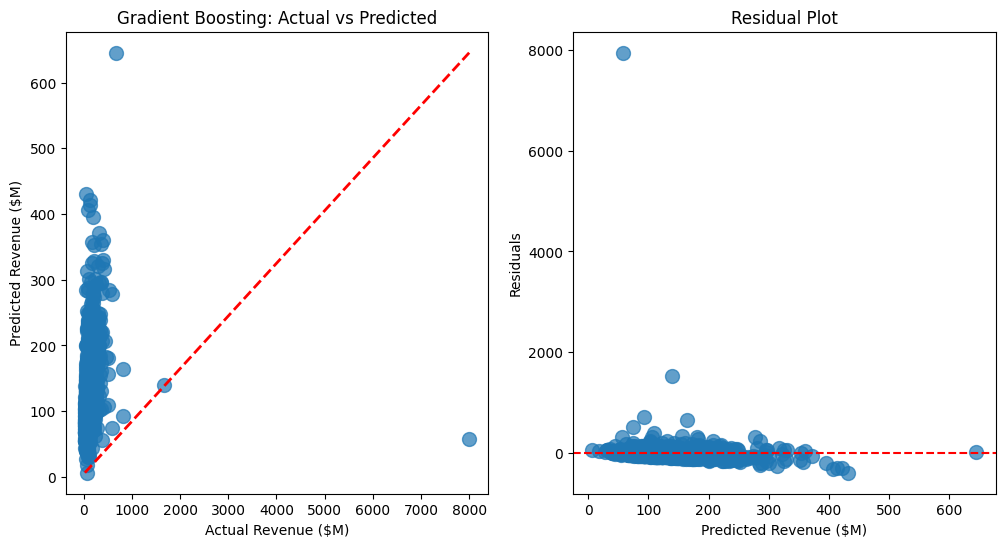

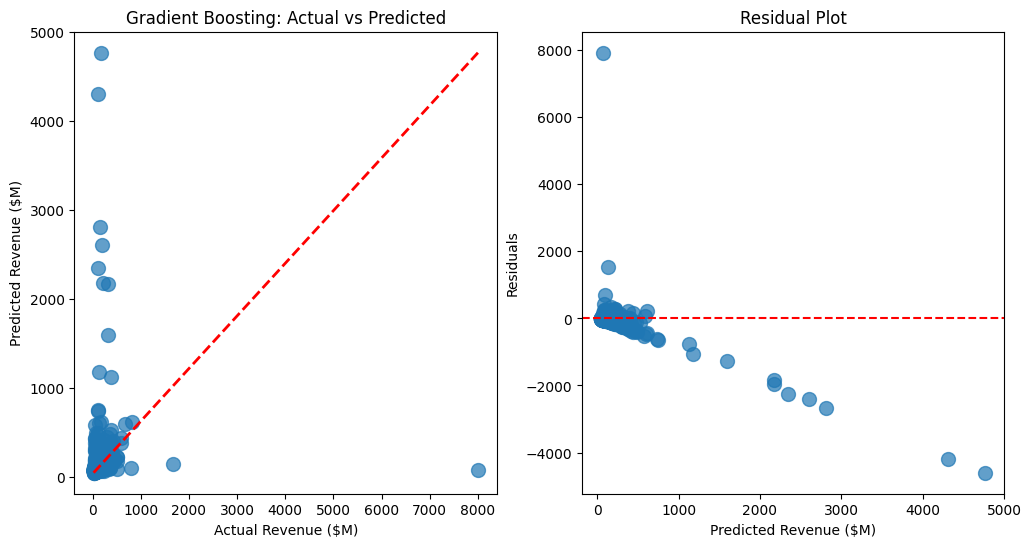

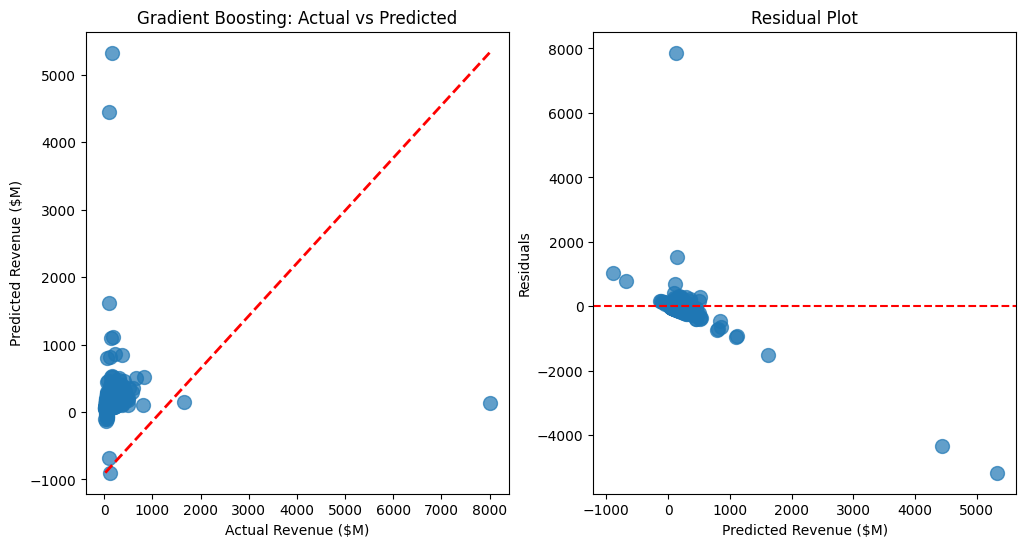

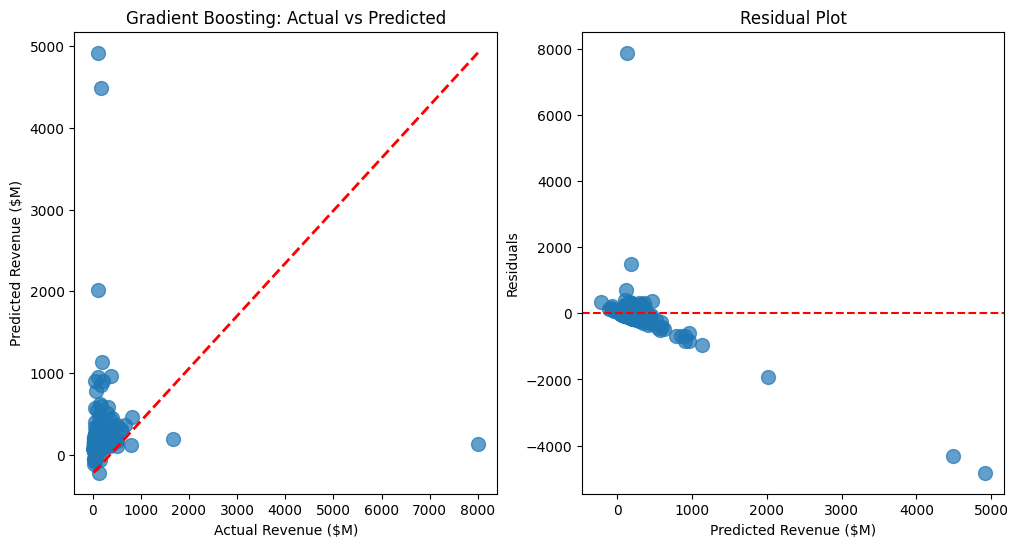

In [100]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100,random_state=42, n_jobs=-1, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,loss='squared_error'),
    'XGB Regression' : xgb.XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth=3,random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_compare_vals = model.predict(X_val)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_val, y_pred_compare_vals)),
        'R²': r2_score(y_val, y_pred_compare_vals),
        'MAE': mean_absolute_error(y_val, y_pred_compare_vals)
    }

    plt.figure(figsize=(12, 6))

    print("Name of Model", name)
    # Plot 1: Predictions vs Actual
    plt.subplot(1, 2, 1)
    plt.scatter(y_val, y_pred_compare_vals, alpha=0.7, s=100)
    plt.plot([y_val.min(), y_val.max()], [y_pred_compare_vals.min(), y_pred_compare_vals.max()], 'r--', lw=2)
    plt.xlabel('Actual Revenue ($M)')
    plt.ylabel('Predicted Revenue ($M)')
    plt.title('Gradient Boosting: Actual vs Predicted')
    
    # Plot 2: Residuals
    plt.subplot(1, 2, 2)
    residuals = y_val - y_pred_compare_vals
    plt.scatter(y_pred_compare_vals, residuals, alpha=0.7, s=100)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Revenue ($M)')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

# Compare results
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df.round(4))